This notebook will demonstrate the preprocessing step of converting an attribute with continuous data into a discrete attribute using a variety of binning methods (supervised and unsupervised).

Import Dependencies

In [1]:
from sklearn.preprocessing import KBinsDiscretizer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Retrieve Data

In [17]:
df = pd.read_csv('preprocessed_data.csv')
df = df.drop(columns=['class'])
df.head()

,Unnamed: 0,alpha,delta,u,g,r,i,z,redshift
0,0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,0.634794
1,1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,0.779136
2,2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,0.644195
3,3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,0.932346
4,4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,0.116123


In [6]:
df.dtypes

obj_ID         float64
alpha          float64
delta          float64
u              float64
g              float64
r              float64
i              float64
z              float64
run_ID           int64
rerun_ID         int64
cam_col          int64
field_ID         int64
spec_obj_ID    float64
class           object
redshift       float64
plate            int64
MJD              int64
fiber_ID         int64
dtype: object

Let's pick the attribute "u" to complete discretization on.

In [95]:
u = pd.DataFrame(df.u)
u.head()


,u
0,23.87882
1,24.77759
2,25.26307
3,22.13682
4,19.43718


Let's check for outliers.

In [96]:
print((u < 0).sum())

u    1
dtype: int64


There's an outlier we need to remove.

In [97]:
u.nsmallest(1,'u')


,u
79543,-9999.0


In [98]:
u = u.drop(index=79543)

In [99]:
u.nsmallest(1,'u')

,u
57763,10.99623


Let's look at the data.

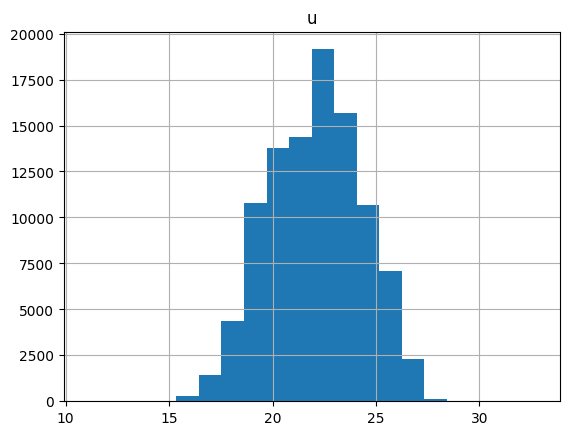

In [100]:
u.hist(bins = 20)
plt.show()

Let's now set up the discretizer so that it uses uniform discretization (bins of same width).

In [101]:
dc = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform');

Now let's discretize u.

In [102]:
dc.fit(u)
Xu = dc.transform(u)
print(Xu)

[[5.]
 [6.]
 [6.]
 ...
 [4.]
 [6.]
 [5.]]


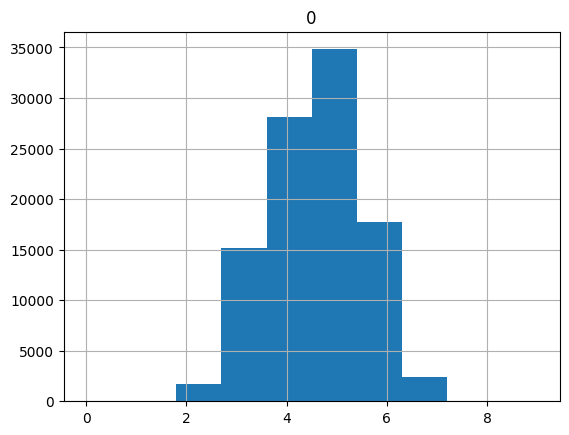

In [103]:
Xd = pd.DataFrame(Xu)
Xd.hist(bins = 10)
plt.show()

In [104]:
print(dc.bin_edges_)

[array([10.99623 , 13.174746, 15.353262, 17.531778, 19.710294, 21.88881 ,
        24.067326, 26.245842, 28.424358, 30.602874, 32.78139 ])          ]


Time to try with quantile binning. Each bin has the same number of values.

In [105]:
dc = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile');

In [106]:
dc.fit(u)
Xu = dc.transform(u)
print(Xu)

[[7.]
 [8.]
 [9.]
 ...
 [3.]
 [9.]
 [5.]]


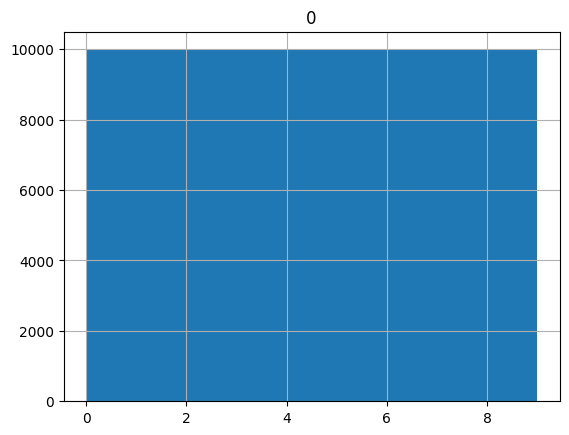

In [107]:
Xd = pd.DataFrame(Xu)
Xd.hist(bins=10)
plt.show()

In [108]:
print(dc.bin_edges_)

[array([10.99623 , 19.117086, 19.961096, 20.74869 , 21.560702, 22.17914 ,
        22.741844, 23.334264, 24.083748, 25.096442, 32.78139 ])          ]


Finally, let's try kmeans.

In [13]:
dc = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='kmeans');

In [21]:
dc.fit(df)
#Xu = dc.transform(u)
#df = dc.transform(df)
print(df)


AttributeError: 'numpy.ndarray' object has no attribute 'describe'

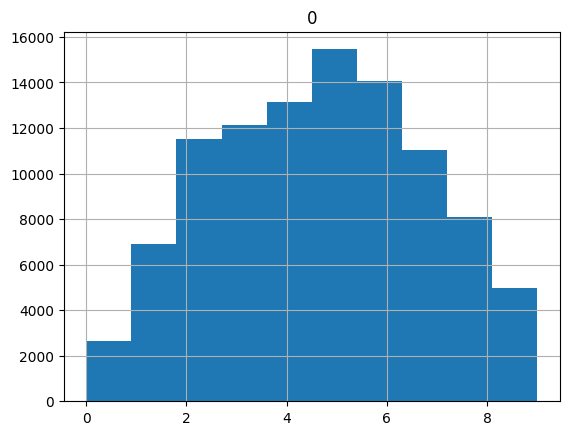

In [111]:
Xd = pd.DataFrame(Xu)
Xd.hist(bins=10)
plt.show()

In [112]:
print(dc.bin_edges_)

[array([10.99623   , 17.86389903, 19.07091461, 20.04854328, 21.02701182,
        21.97193536, 22.84799271, 23.75800982, 24.73827666, 25.79009659,
        32.78139   ])                                                   ]
